# Excelerate DVA Week 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
user_data = pd.read_csv('user_data.csv')
oppo_info = pd.read_csv('opportunity_info.csv')

## User Data:

In [8]:
user_data.head()

,PreferredSponsors,Gender,Country,Degree,Sign Up Date,city,zip,isFromSocialMedia,Excelerate,GlobalShala,Grant Thornton China,Illinois Institute of Technology,Saint Louis University
0,"['GlobalShala', 'Grant Thornton China', 'Saint...",0.0,Nigeria,Undergraduate Student,2023-07-23,Owerri,460103,0,1,1,1,1,1
1,"['GlobalShala', 'Grant Thornton China', 'Saint...",0.0,India,Undergraduate Student,2023-04-24,kottayam,686501,0,1,1,1,1,1
2,"['GlobalShala', 'Grant Thornton China', 'Saint...",1.0,Ghana,Not in Education,2023-06-15,Kumasi,AT-1214-9090,0,1,1,1,1,1
3,"['GlobalShala', 'Grant Thornton China', 'Saint...",0.0,Nigeria,Undergraduate Student,2023-07-27,Lagos,100278,1,1,1,1,1,1
4,"['GlobalShala', 'Grant Thornton China', 'Saint...",0.0,India,High School Student,2023-05-05,RAS,388570,1,1,1,1,1,1


In [10]:
user_data.columns

Index(['PreferredSponsors', 'Gender', 'Country', 'Degree', 'Sign Up Date',
       'city', 'zip', 'isFromSocialMedia', 'Excelerate', 'GlobalShala',
       'Grant Thornton China', 'Illinois Institute of Technology',
       'Saint Louis University'],
      dtype='object')

In [12]:
print(user_data.isnull().sum())

PreferredSponsors                    0
Gender                              83
Country                              0
Degree                               0
Sign Up Date                         0
city                                 0
zip                                  0
isFromSocialMedia                    0
Excelerate                           0
GlobalShala                          0
Grant Thornton China                 0
Illinois Institute of Technology     0
Saint Louis University               0
dtype: int64


In [14]:
user_data.dropna(inplace=True)

In [16]:
print(user_data.isnull().sum())

PreferredSponsors                   0
Gender                              0
Country                             0
Degree                              0
Sign Up Date                        0
city                                0
zip                                 0
isFromSocialMedia                   0
Excelerate                          0
GlobalShala                         0
Grant Thornton China                0
Illinois Institute of Technology    0
Saint Louis University              0
dtype: int64


### Visualizing the outliers

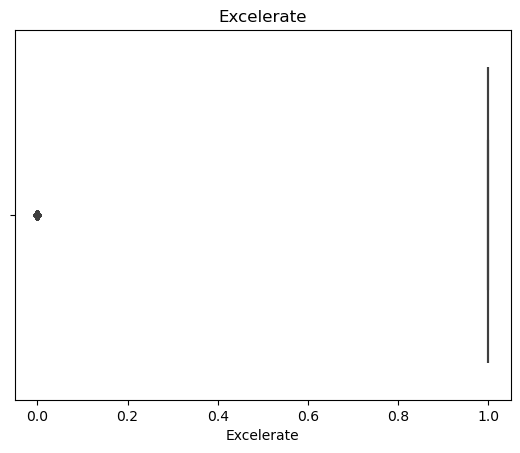

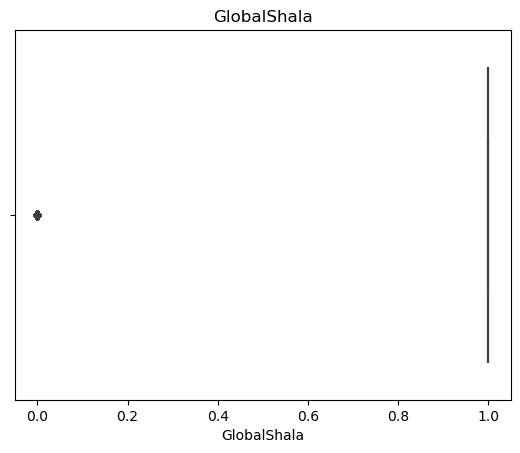

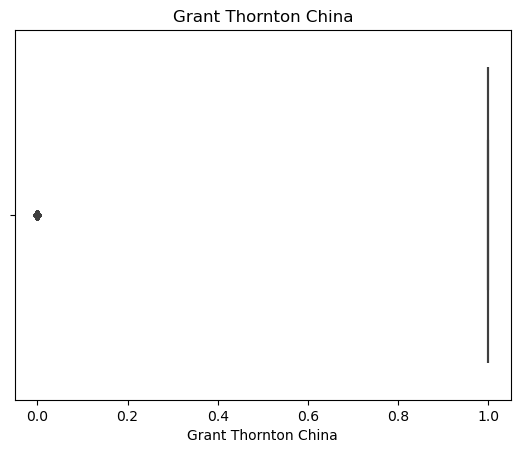

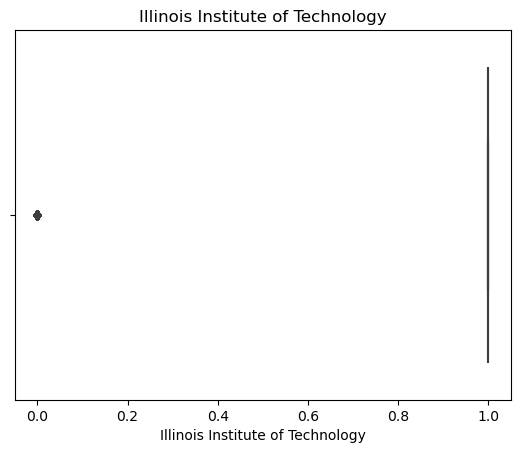

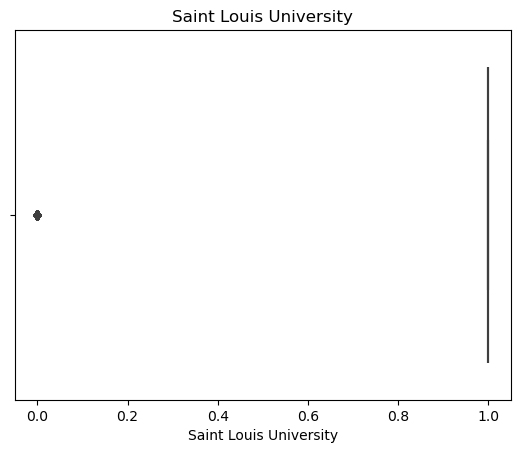

In [22]:
numeric_columns = ['Excelerate', 'GlobalShala', 'Grant Thornton China', 
                   'Illinois Institute of Technology', 'Saint Louis University']
for col in numeric_columns:
    sns.boxplot(x=user_data[col])
    plt.title(col)
    plt.show()

In [24]:
Q1 = user_data[col].quantile(0.25)
Q3 = user_data[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
user_data = user_data[(user_data[col] >= lower_bound) & (user_data[col] <= upper_bound)]

In [26]:
print(user_data['PreferredSponsors'].unique())

["['GlobalShala', 'Grant Thornton China', 'Saint Louis University', 'Illinois Institute of Technology', 'Excelerate']"
 "['Saint Louis University']" "['Saint Louis University', 'Excelerate']"
 "['GlobalShala', 'Illinois Institute of Technology', 'Saint Louis University', 'Grant Thornton China', 'Excelerate']"
 "['GlobalShala', 'Saint Louis University', 'Illinois Institute of Technology', 'Grant Thornton China', 'Excelerate']"
 "['Saint Louis University', 'Grant Thornton China', 'Excelerate']"
 "['GlobalShala', 'Saint Louis University', 'Excelerate']"
 "['GlobalShala', 'Saint Louis University', 'Illinois Institute of Technology', 'Excelerate', 'Grant Thornton China']"
 "['Saint Louis University', 'GlobalShala', 'Illinois Institute of Technology', 'Grant Thornton China', 'Excelerate']"
 "['GlobalShala', 'Grant Thornton China', 'Excelerate', 'Illinois Institute of Technology', 'Saint Louis University']"
 "['GlobalShala', 'Grant Thornton China', 'Illinois Institute of Technology', 'Exceler

In [28]:
user_data['PreferredSponsors'] = user_data['PreferredSponsors'].str.strip().str.title()

In [32]:
user_data.describe()

,Gender,isFromSocialMedia,Excelerate,GlobalShala,Grant Thornton China,Illinois Institute of Technology,Saint Louis University
count,15522.000000,15522.000000,15522.000000,15522.000000,15522.000000,15522.000000,15522.0
mean,0.385066,0.486278,0.969398,0.950715,0.960508,0.946012,1.0
std,0.486627,0.499828,0.172242,0.216469,0.194769,0.226001,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0
50%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [34]:
user_data = user_data.drop_duplicates()

In [40]:
print(user_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15321 entries, 0 to 16625
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PreferredSponsors                 15321 non-null  object 
 1   Gender                            15321 non-null  float64
 2   Country                           15321 non-null  object 
 3   Degree                            15321 non-null  object 
 4   Sign Up Date                      15321 non-null  object 
 5   city                              15321 non-null  object 
 6   zip                               15321 non-null  object 
 7   isFromSocialMedia                 15321 non-null  int64  
 8   Excelerate                        15321 non-null  int64  
 9   GlobalShala                       15321 non-null  int64  
 10  Grant Thornton China              15321 non-null  int64  
 11  Illinois Institute of Technology  15321 non-null  int64  
 12  Sain

In [42]:
user_data.describe(include='all')

,PreferredSponsors,Gender,Country,Degree,Sign Up Date,city,zip,isFromSocialMedia,Excelerate,GlobalShala,Grant Thornton China,Illinois Institute of Technology,Saint Louis University
count,15321,15321.000000,15321,15321,15321,15321,15321,15321.000000,15321.000000,15321.000000,15321.000000,15321.000000,15321.0
unique,72,NaN,125,4,450,4126,6581,NaN,NaN,NaN,NaN,NaN,NaN
top,"['Globalshala', 'Grant Thornton China', 'Saint...",NaN,India,Undergraduate Student,2023-06-16,Hyderabad,63108,NaN,NaN,NaN,NaN,NaN,NaN
freq,12929,NaN,7169,6136,833,621,567,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.386006,NaN,NaN,NaN,NaN,NaN,0.487305,0.970237,0.951439,0.961295,0.946740,1.0
std,NaN,0.486848,NaN,NaN,NaN,NaN,NaN,0.499855,0.169939,0.214955,0.192897,0.224559,0.0
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,1.000000,1.000000,1.0
50%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,1.000000,1.000000,1.0
75%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [46]:
from datetime import datetime

user_data['Sign Up Date'] = pd.to_datetime(user_data['Sign Up Date'])
user_data['Active Days'] = (datetime.now() - user_data['Sign Up Date']).dt.days

In [48]:
sponsor_columns = ['Excelerate', 'GlobalShala', 'Grant Thornton China', 
                   'Illinois Institute of Technology', 'Saint Louis University']
user_data['SponsorEngagementCount'] = user_data[sponsor_columns].sum(axis=1)

In [50]:
user_data['Gender_Num'] = user_data['Gender'].map({'Male': 0, 'Female': 1})

In [56]:
# Save entire DataFrame to CSV
oppo_info.to_csv('user_data_week2.csv', index=False)

# Print confirmation
print("Entire user_data DataFrame has been saved to 'user_data_week2.csv'")

Entire user_data DataFrame has been saved to 'user_data_week2.csv'


## opportunity_info Data

In [59]:
oppo_info.head()

,Profile Id,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,Gender,City,State,Country,Zip Code,...,Productivity,Flexibility,Media Literacy,Social Skills,Technology Literacy,Leadership,Communication,Information Literacy,Career Readiness,Skills Count
0,31ce84c2-2bd1-40ba-b2d8-f164fe125306,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,0,2023-01-05 18:58:39,0.0,Dhaka,Savar,Bangladesh,1342,...,0,0,0,0,0,0,0,0,0,14
1,36814990-f854-4f76-8c63-91f27567d080,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,0,2023-01-05 18:58:39,1.0,Amritsar,Punjab,Afghanistan,123242,...,0,0,0,0,0,0,1,0,1,14
2,8154328c-f8fe-4bd1-af05-783e140f68b5,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,0,2023-01-05 18:58:39,1.0,Satna,Madhya pradesh,India,485001,...,0,0,0,0,0,0,0,0,0,14
3,a83abad6-db1e-44c4-a8f4-9e397e282d73,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,0,2023-01-05 18:58:39,0.0,Hyderabad,Telangana,India,500039,...,0,0,0,0,0,0,0,0,0,14
4,c2b8a15f-2ba3-41e4-a553-7ca68b0d4a54,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,0,2023-01-05 18:58:39,0.0,Bangalore,Karnataka,India,560105,...,0,0,0,0,0,0,0,0,0,14


In [63]:
oppo_info.columns

Index(['Profile Id', 'Opportunity Id', 'Opportunity Name',
       'Opportunity Category', 'Opportunity End Date', 'Gender', 'City',
       'State', 'Country', 'Zip Code', 'Graduation Date(YYYY MM)',
       'Current Student Status', 'Current/Intended Major',
       'Status Description', 'Apply Date', 'Opportunity Start Date',
       'Reward Amount', 'Badge Id', 'Badge Name', 'Skill Points Earned',
       'Skills Earned', 'Critical Thinking', 'Creative Thinking', 'Initiative',
       'College Readiness', 'Collaboration', 'Productivity', 'Flexibility',
       'Media Literacy', 'Social Skills', 'Technology Literacy', 'Leadership',
       'Communication', 'Information Literacy', 'Career Readiness',
       'Skills Count'],
      dtype='object')

In [96]:
print(oppo_info.isnull().sum())

Profile Id                      0
Opportunity Id                  0
Opportunity Name                0
Opportunity Category            0
Opportunity End Date            0
Gender                         72
City                            0
State                           5
Country                         0
Zip Code                        0
Graduation Date(YYYY MM)       12
Current Student Status          0
Current/Intended Major          3
Status Description              0
Apply Date                    458
Opportunity Start Date        802
Reward Amount                   0
Badge Id                    17685
Badge Name                  17685
Skill Points Earned             0
Skills Earned                   0
Critical Thinking               0
Creative Thinking               0
Initiative                      0
College Readiness               0
Collaboration                   0
Productivity                    0
Flexibility                     0
Media Literacy                  0
Social Skills 

In [98]:
# Drop multiple columns
oppo_info = oppo_info.drop(columns=['Badge Id', 'Badge Name'])

In [100]:
oppo_info.dropna(inplace=True)

In [102]:
print(oppo_info.isnull().sum())

Profile Id                  0
Opportunity Id              0
Opportunity Name            0
Opportunity Category        0
Opportunity End Date        0
Gender                      0
City                        0
State                       0
Country                     0
Zip Code                    0
Graduation Date(YYYY MM)    0
Current Student Status      0
Current/Intended Major      0
Status Description          0
Apply Date                  0
Opportunity Start Date      0
Reward Amount               0
Skill Points Earned         0
Skills Earned               0
Critical Thinking           0
Creative Thinking           0
Initiative                  0
College Readiness           0
Collaboration               0
Productivity                0
Flexibility                 0
Media Literacy              0
Social Skills               0
Technology Literacy         0
Leadership                  0
Communication               0
Information Literacy        0
Career Readiness            0
Skills Cou

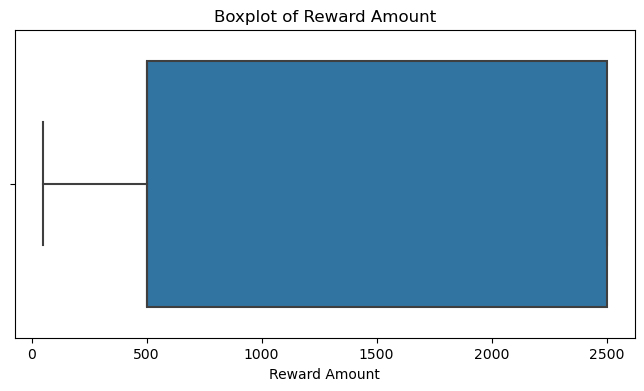

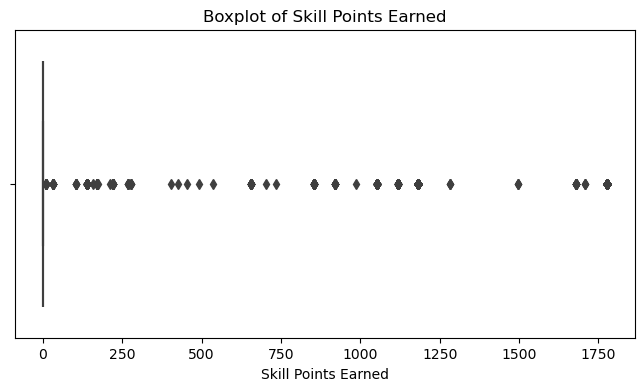

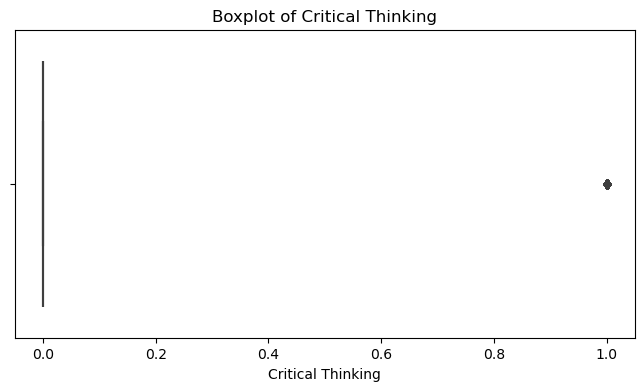

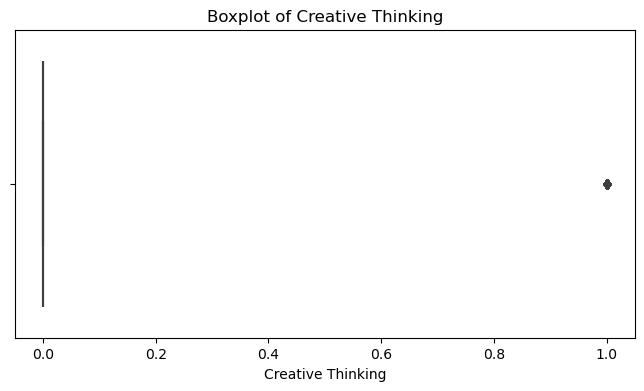

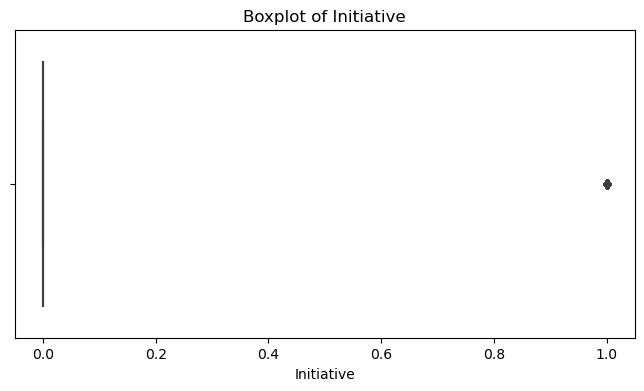

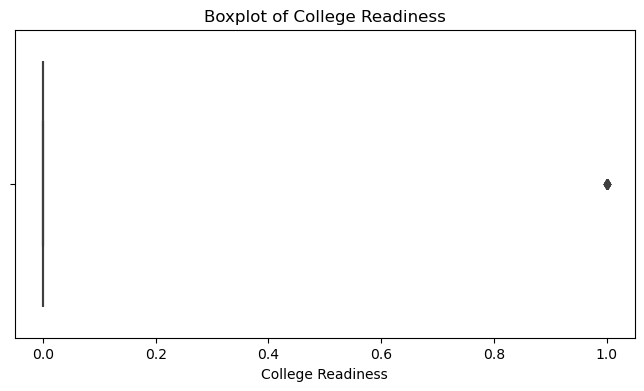

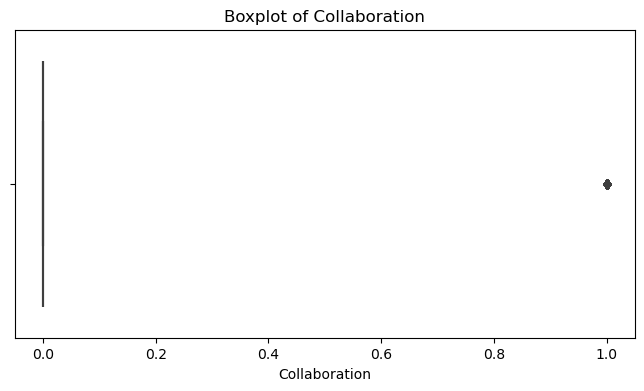

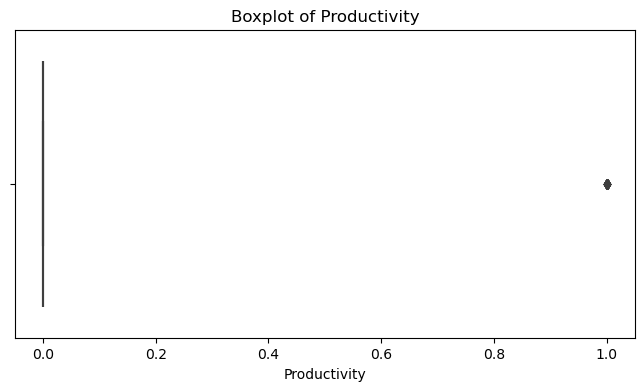

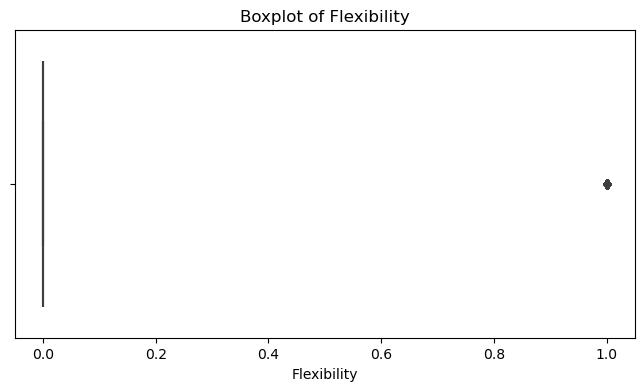

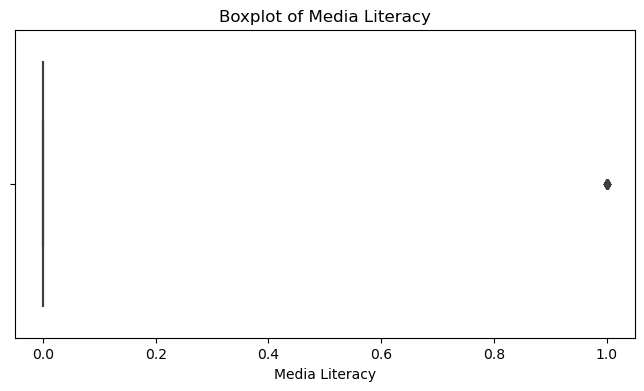

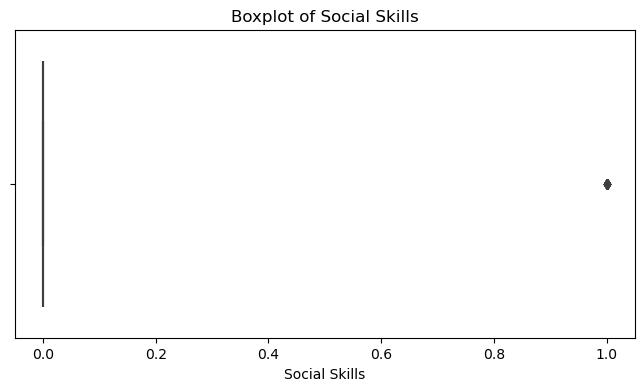

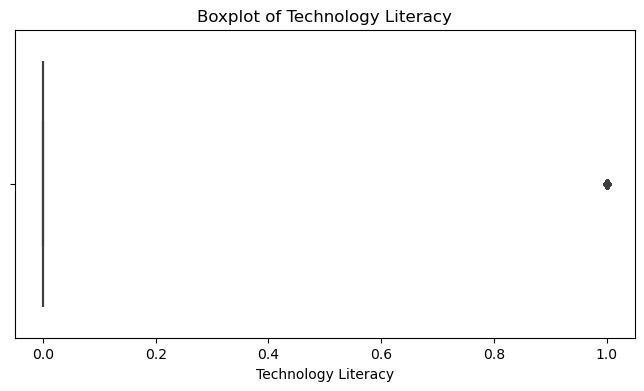

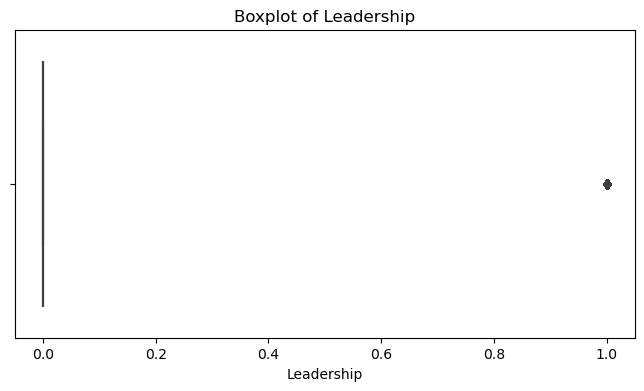

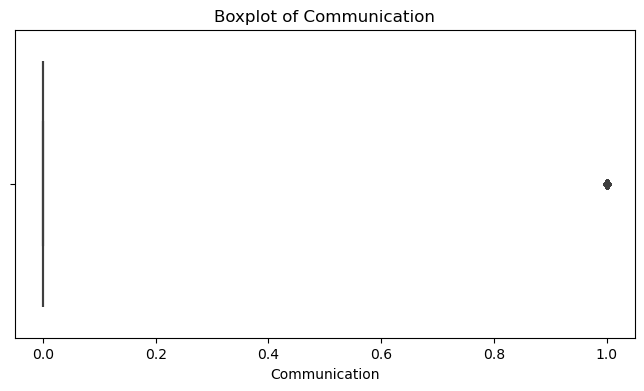

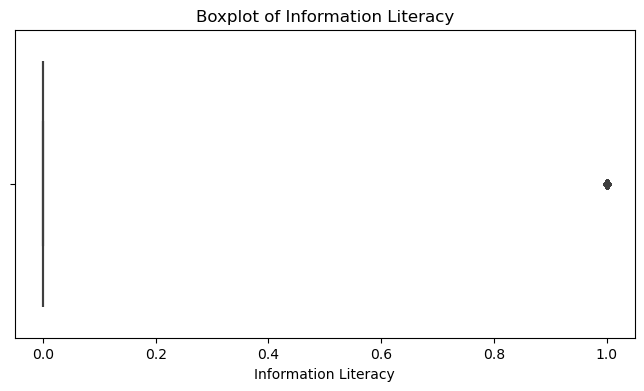

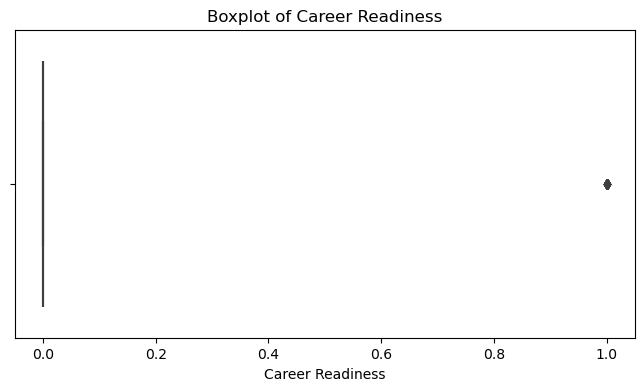

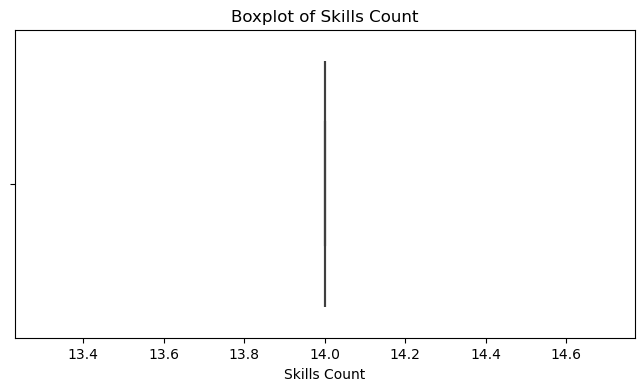

In [104]:
numeric_cols = ['Reward Amount', 'Skill Points Earned', 'Critical Thinking', 
                'Creative Thinking', 'Initiative', 'College Readiness', 
                'Collaboration', 'Productivity', 'Flexibility', 'Media Literacy', 
                'Social Skills', 'Technology Literacy', 'Leadership', 
                'Communication', 'Information Literacy', 'Career Readiness', 
                'Skills Count']
oppo_info[numeric_cols] = oppo_info[numeric_cols].apply(pd.to_numeric, errors='coerce')
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=oppo_info[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

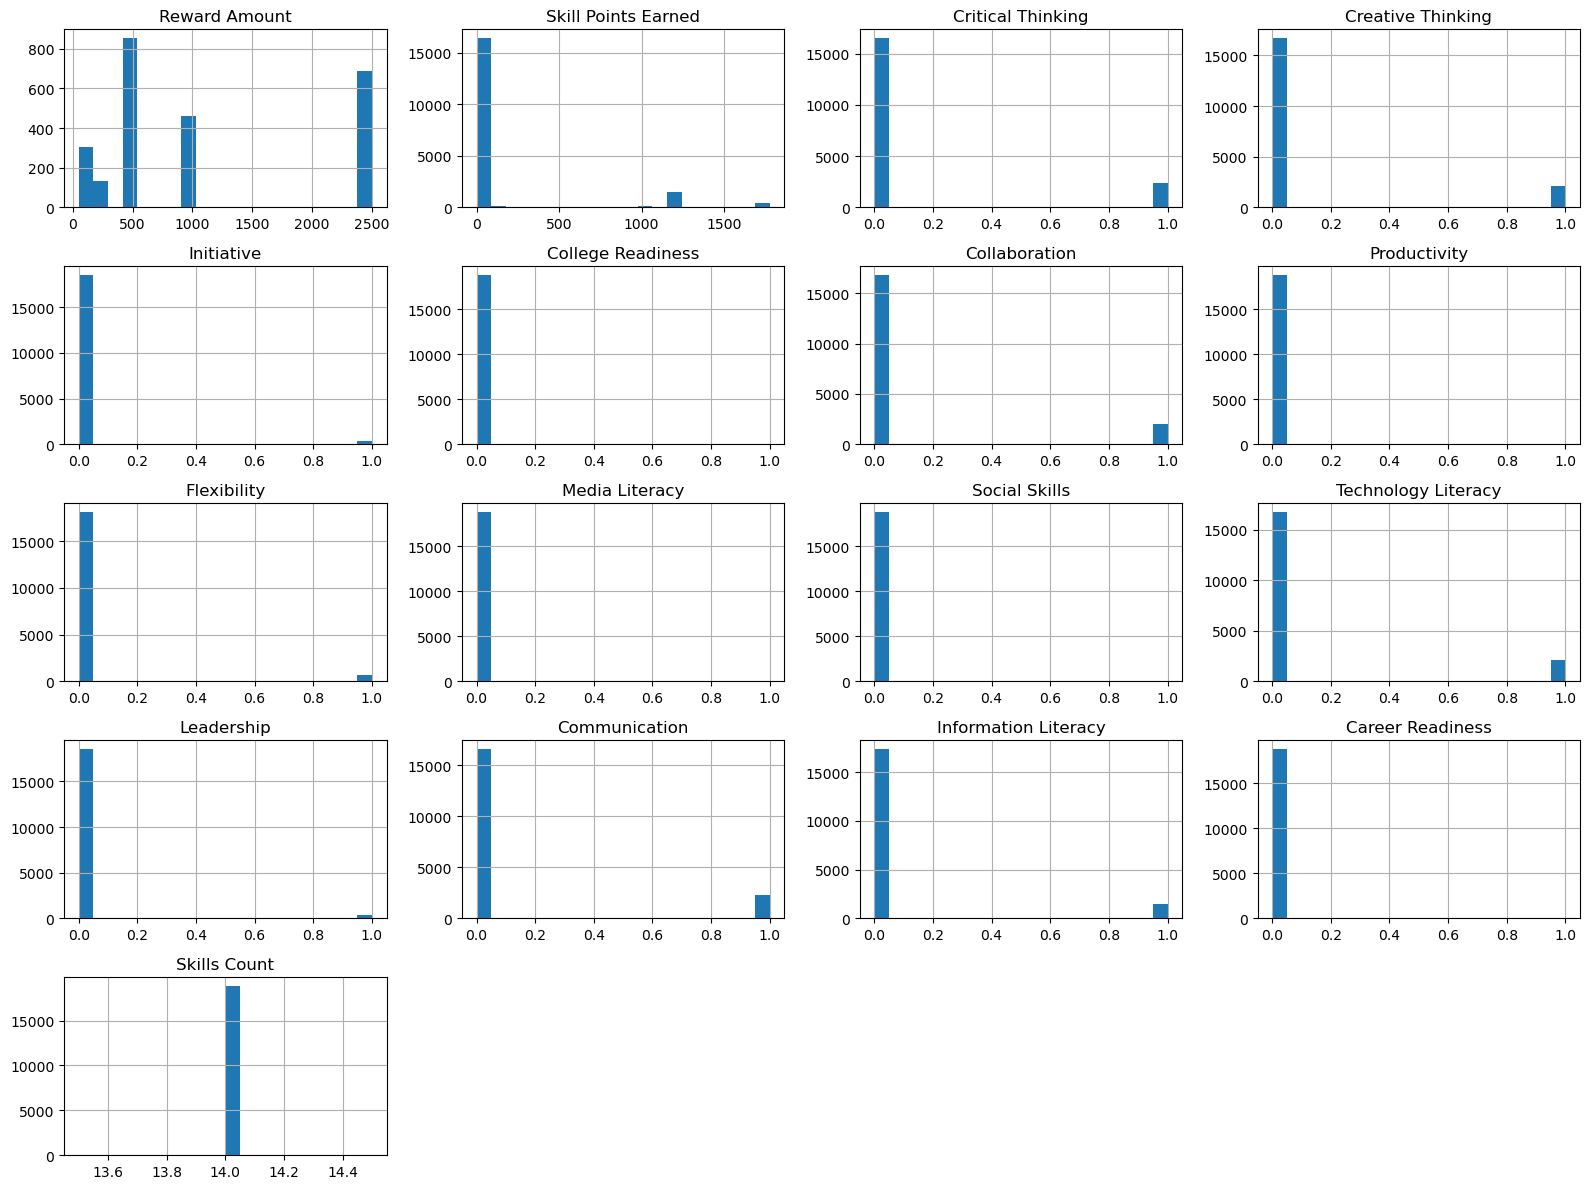

In [79]:
# Plot histograms for numeric columns
oppo_info[numeric_cols].hist(figsize=(16, 12), bins=20)
plt.tight_layout()
plt.show()

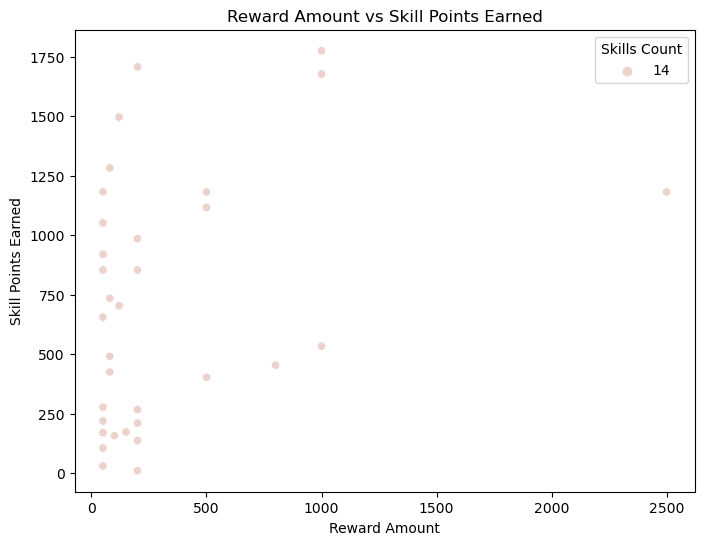

In [106]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=oppo_info, x='Reward Amount', y='Skill Points Earned', hue='Skills Count')
plt.title('Reward Amount vs Skill Points Earned')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


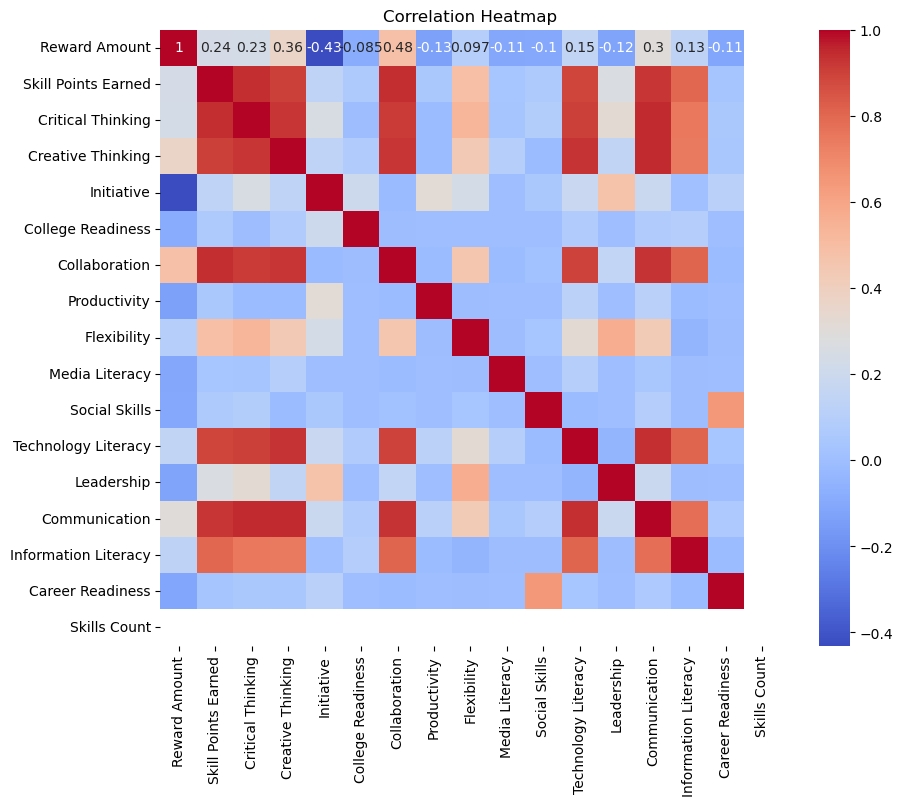

In [108]:
correlation_matrix = oppo_info[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

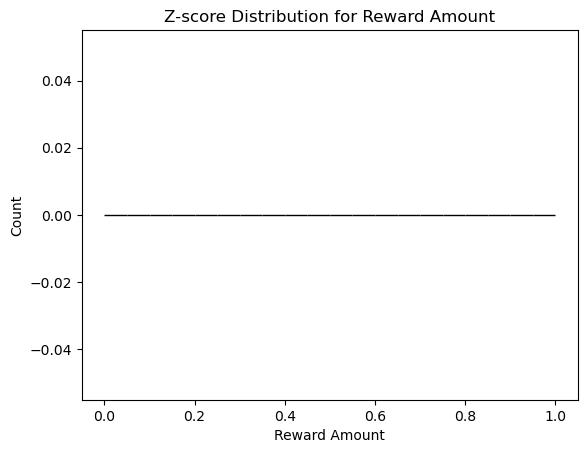

Number of potential outliers: 2415


In [110]:
from scipy.stats import zscore

# Compute Z-scores for numeric columns
z_scores = oppo_info[numeric_cols].apply(zscore)

# Visualize Z-scores for a specific column
sns.histplot(z_scores['Reward Amount'], bins=20, kde=True)
plt.title('Z-score Distribution for Reward Amount')
plt.show()

# Flag rows with Z-score > threshold (e.g., 3)
outliers = (z_scores > 3).any(axis=1)
print(f'Number of potential outliers: {outliers.sum()}')

In [114]:
oppo_info.shape

(18873, 34)

In [116]:
import pandas as pd

# Ensure 'Sign Up Date' is in datetime format
user_data['Sign Up Date'] = pd.to_datetime(user_data['Sign Up Date'])

# Calculate length of time active
current_date = pd.Timestamp.now()
user_data['Days Active'] = (current_date - user_data['Sign Up Date']).dt.days

# Preview the result
print(user_data[['Sign Up Date', 'Days Active']].head())

  Sign Up Date  Days Active
0   2023-07-23          509
1   2023-04-24          599
2   2023-06-15          547
3   2023-07-27          505
4   2023-05-05          588


In [120]:
# Group by Opportunity Id and calculate the completion rate
completion_stats = oppo_info.groupby('Opportunity Id')['Status Description'].value_counts().unstack(fill_value=0)
completion_stats['Completion Rate'] = completion_stats.get('Completed', 0) / completion_stats.sum(axis=1)

# Merge back into oppo_info
oppo_info = oppo_info.merge(completion_stats['Completion Rate'], on='Opportunity Id', how='left')

# Preview the result
print(oppo_info[['Opportunity Id', 'Completion Rate']].head())

                   Opportunity Id  Completion Rate
0  00000000-0G4F-19XB-EXPW-KS8F3N              0.0
1  00000000-0G4F-19XB-EXPW-KS8F3N              0.0
2  00000000-0G4F-19XB-EXPW-KS8F3N              0.0
3  00000000-0G4F-19XB-EXPW-KS8F3N              0.0
4  00000000-0G4F-19XB-EXPW-KS8F3N              0.0


In [122]:
# Aggregate opportunity-level stats
opportunity_aggregates = oppo_info.groupby('Opportunity Id').agg({
    'Reward Amount': 'mean',
    'Skill Points Earned': 'mean',
    'Skills Count': 'mean'
}).reset_index()

# Rename columns for clarity
opportunity_aggregates.rename(columns={
    'Reward Amount': 'Avg Reward Amount',
    'Skill Points Earned': 'Avg Skill Points Earned',
    'Skills Count': 'Avg Skills Count'
}, inplace=True)

# Merge back into oppo_info
oppo_info = oppo_info.merge(opportunity_aggregates, on='Opportunity Id', how='left')

# Preview the result
print(oppo_info[['Opportunity Id', 'Avg Reward Amount', 'Avg Skill Points Earned']].head())

                   Opportunity Id  Avg Reward Amount  Avg Skill Points Earned
0  00000000-0G4F-19XB-EXPW-KS8F3N              200.0                      2.0
1  00000000-0G4F-19XB-EXPW-KS8F3N              200.0                      2.0
2  00000000-0G4F-19XB-EXPW-KS8F3N              200.0                      2.0
3  00000000-0G4F-19XB-EXPW-KS8F3N              200.0                      2.0
4  00000000-0G4F-19XB-EXPW-KS8F3N              200.0                      2.0


In [124]:
# Save entire DataFrame to CSV
oppo_info.to_csv('opportunity_info_week2.csv', index=False)

# Print confirmation
print("Entire user_data DataFrame has been saved to 'opportunity_info_week2.csv'")

Entire user_data DataFrame has been saved to 'opportunity_info_week2.csv'
